In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
gameweek = pd.read_csv('TransformedData/GraphingGW.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme


In [3]:
gameweek.sample(5,random_state=0)
# columns = gameweek.columns

# If you play then your shape elo is afeected, I think that is only fair to update palyer elo.
#Last game played using kickoff time
# print(gameweek.shape)

,Unnamed: 0,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,kickoffdate,kickofftime
12181,12181,Freddie Woodman,GK,Newcastle,0.0,0,0,0,0,0.0,513,216,0,0,0.0,0.0,0,18,0,0,0,0,22,0,28663,1,1,0.0,0,-480,501,981,43,True,0,22,2022-01-15,15:00:00
3272,3272,Steven Bergwijn,MID,Spurs,0.0,0,0,0,0,0.0,369,51,0,0,0.0,0.0,0,1,0,0,0,0,6,0,44025,1,3,0.0,0,-21806,359,22165,60,False,0,6,2021-09-26,15:30:00
6146,6146,Wilfried Zaha,MID,Crystal Palace,4.2,0,0,24,1,24.4,154,105,0,1,10.0,46.6,90,20,0,0,0,0,11,0,593666,0,2,29.0,8,114777,128671,13894,69,True,0,11,2021-11-06,15:00:00
20918,20918,Aaron Wan-Bissaka,DEF,Man Utd,1.5,0,0,16,0,1.3,288,294,4,0,1.5,14.0,90,11,0,0,0,0,33,0,283732,0,4,0.0,0,4391,6064,1673,51,False,0,33,2022-04-19,19:00:00
1985,1985,Patrick Bamford,FWD,Leeds,4.2,0,0,5,0,5.1,189,36,3,0,8.6,20.4,90,11,0,0,0,0,4,0,902862,3,0,60.0,2,-177771,86070,263841,79,True,0,4,2021-09-12,15:30:00


Some features that need to be created: 
- elo based on a player which only updates if player was involved in a game : temporal
- ~~played or not played indicator.~~
- last time a player was involved : temporal debateable at the moment if this will add any value.
- ~~Home and Away indicator~~ : Completed
- ~~position catergorical variables update [0,0,0] = keeper [0,0,1] = defender [0,1,0] = midfielder [1,0,0] = forward~~ :Completed


In [4]:
gameweek.query("position == 'FWD' & round == 9") # I like this very much easier to read


,Unnamed: 0,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,kickoffdate,kickofftime
4744,4744,Keinan Davis,FWD,Aston Villa,-0.1,0,0,0,0,0.0,49,81,0,0,0.0,0.0,0,1,0,0,0,0,9,0,149750,1,3,0.0,0,17809,30650,12841,44,False,0,9,2021-10-22,19:00:00
4750,4750,Moise Kean,FWD,Everton,0.0,0,0,0,0,0.0,564,86,0,0,0.0,0.0,0,18,0,0,0,0,9,0,1233,5,2,0.0,0,-24,0,24,60,True,0,9,2021-10-23,14:00:00
4760,4760,Joshua King,FWD,Watford,4.5,0,3,72,0,12.9,468,86,2,3,24.1,106.4,90,8,0,0,0,0,9,0,55745,5,2,122.0,16,-6047,3096,9143,55,False,1,9,2021-10-23,14:00:00
4761,4761,Richarlison de Andrade,FWD,Everton,2.0,0,0,25,0,14.5,180,86,4,1,7.7,39.2,30,18,0,0,0,0,9,0,338072,5,2,23.0,4,412,16894,16482,74,True,1,9,2021-10-23,14:00:00
4774,4774,Armando Broja,FWD,Southampton,4.7,0,2,28,0,1.2,518,89,2,1,7.6,33.6,78,5,0,0,0,0,9,0,101480,2,2,41.0,8,50958,57469,6511,50,True,0,9,2021-10-23,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,5303,Juan Camilo Hernández Suárez,FWD,Watford,0.8,1,0,22,0,61.5,472,86,2,0,12.2,27.2,90,8,0,0,0,0,9,0,130577,5,2,33.0,5,-6546,3821,10367,50,False,0,9,2021-10-23,14:00:00
5306,5306,Daniel N'Lundulu,FWD,Southampton,0.0,0,0,0,0,0.0,344,89,0,0,0.0,0.0,0,5,0,0,0,0,9,0,1384,2,2,0.0,0,-35,0,35,45,True,0,9,2021-10-23,14:00:00
5342,5342,Halil Dervişoğlu,FWD,Brentford,0.0,0,0,0,0,0.0,95,82,0,0,0.0,0.0,0,9,0,0,0,0,9,0,1320,2,1,0.0,0,-50,0,50,54,True,0,9,2021-10-24,13:00:00
5347,5347,Jordan Hugill,FWD,Norwich,0.0,0,0,0,0,0.0,322,84,0,0,0.0,0.0,0,6,0,0,0,0,9,0,973,0,7,0.0,0,-41,0,41,54,False,0,9,2021-10-23,11:30:00


PD

In [5]:
# we are trying to self merge the table 

# gameweek.merge(right=gameweek, how='left',on='name') 
# gameweek is too big a file to do all these things

columns = []

temporal = gameweek.merge(right=gameweek, how='left',on='name',suffixes=['','_lag']) 



In [62]:
# okay lets start with some pivot tabels
series_temp =temporal[['round','round_lag']]
series_temp['lag'] = series_temp['round']-series_temp['round_lag']

/var/folders/p2/8nzyc2ws2ds3cgyf8s70dnww0000gn/T/ipykernel_75384/1272843087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_temp['lag'] = series_temp['round']-series_temp['round_lag']


Create Violin plot of player performance over the course of the seasom

In [19]:

#We need players to know if there are active minutes played
def playtime(row):
    #we want player with real game time
    if row <5:
            result = 0
    else:
            result = 1
    return result

trendviolin = (gameweek[['position','was_home','round','kickoffdate','minutes','name','total_points','value','team']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)                

In [21]:
trendviolin.query("minutes > 0")  #query("position == 'DEF'")

,position,was_home,round,kickoffdate,minutes,name,total_points,value,team,was_home_ind,playtime
3,MID,False,1,2021-08-14,90,James Ward-Prowse,2,65,Southampton,0,1
4,MID,True,1,2021-08-14,90,Bruno Miguel Borges Fernandes,20,120,Man Utd,1,1
6,MID,False,1,2021-08-14,90,James McArthur,2,45,Crystal Palace,0,1
9,MID,False,1,2021-08-14,76,Jairo Riedewald,2,50,Crystal Palace,0,1
10,MID,False,1,2021-08-14,14,Alexis Mac Allister,9,55,Brighton,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24555,GK,False,38,2022-05-22,45,John Ruddy,1,43,Wolves,0,1
24557,DEF,False,38,2022-05-22,90,Mohammed Salisu,0,45,Southampton,0,1
24558,MID,True,38,2022-05-22,90,N'Golo Kanté,2,49,Chelsea,1,1
24561,DEF,False,38,2022-05-22,1,Matt Ritchie,1,49,Newcastle,0,0


Text(0, 0.5, 'Total Points')

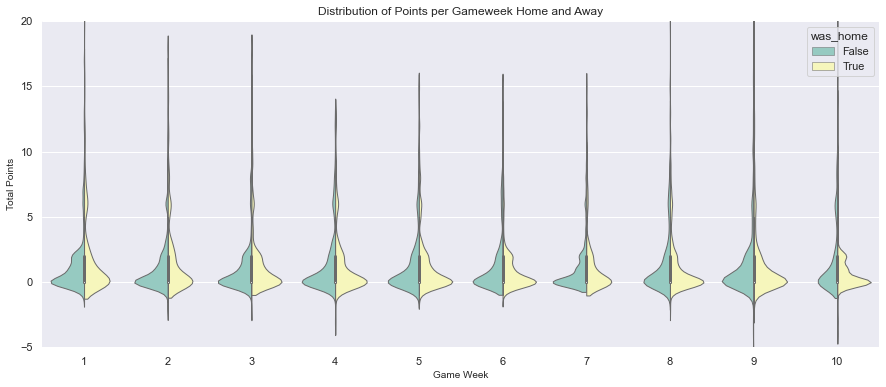

In [32]:
#Setting up the plot

f, ax = plt.subplots(figsize=(15,6))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','was_home']].query(" round <11")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1)

# Finalize the figure
ax.set(ylim=(-5, 20))
ax.set(title='Distribution of Points per Gameweek Home and Away'
)
sns.despine(left=True, bottom=True)
ax.set_xlabel("Game Week", fontsize = 10)
ax.set_ylabel("Total Points", fontsize = 10)

AttributeError: 'numpy.ndarray' object has no attribute 'set'

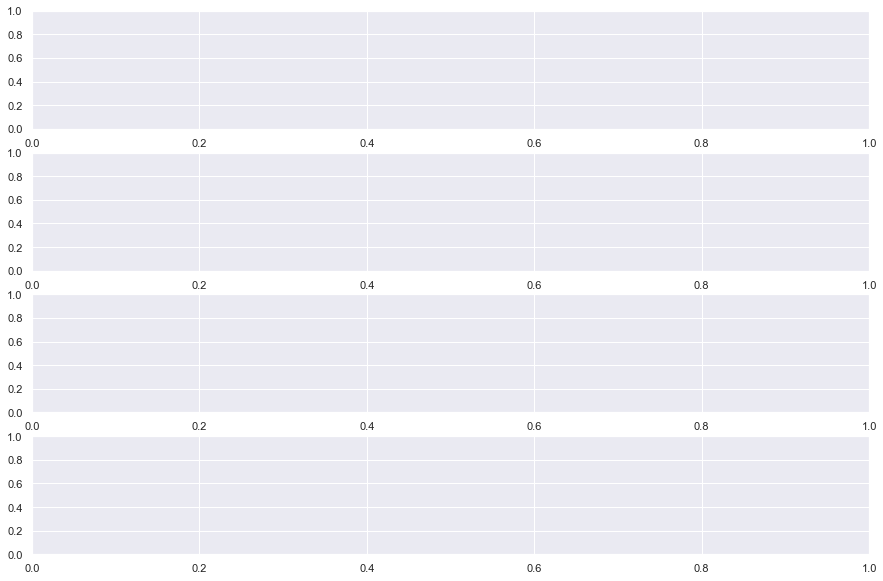

In [34]:
# create subplots of every position

f, ax = plt.subplots(4,1, figsize=(15,10))

ax.set(title='Distribution of Points per Gameweek Home and Away Per Positions'
)

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD'")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])


ax.set_xlabel("Game Week", fontsize = 10)
ax.set_ylabel("Player Position", fontsize = 10)
# Finalize the figure
# ax.set(ylim=(-5, 20))
sns.despine(left=True, bottom=True)

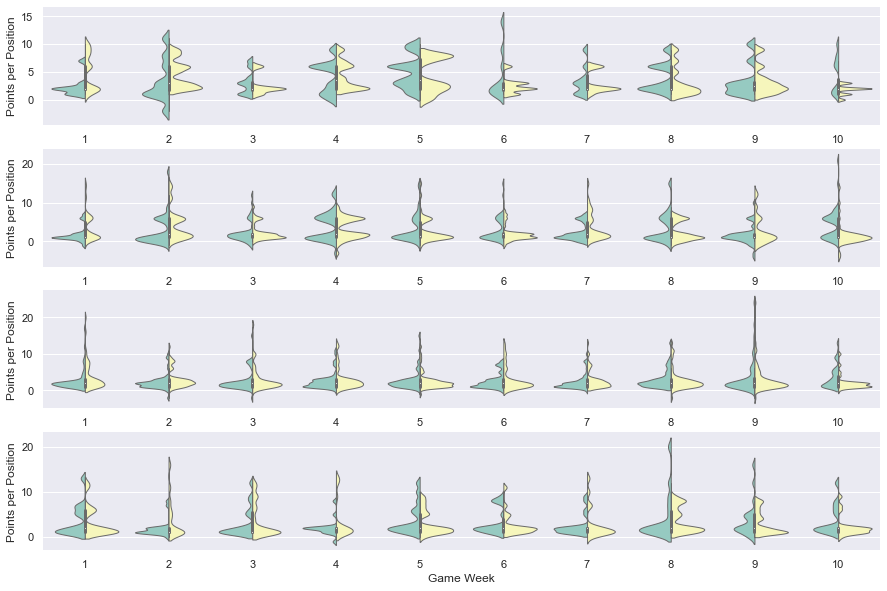

In [38]:
#with playtime minutes


f, ax = plt.subplots(4,1, figsize=(15,10))



sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'GK' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[0])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'DEF'  & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[1])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'MID' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[2])

sns.violinplot( x="round"
                , y="total_points"
                ,hue='was_home'
                , data=trendviolin[['round','total_points','minutes','was_home','position']].query(" round <11 & position == 'FWD' & minutes > 0")
                , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                ,ax=ax[3])

# Finalize the figure
# ax.set(ylim=(-5, 20))
for ax in ax.flat:
    ax.set(xlabel='Game Week', ylabel='Points per Position')
    ax.get_legend().remove()
sns.despine(left=True, bottom=True)


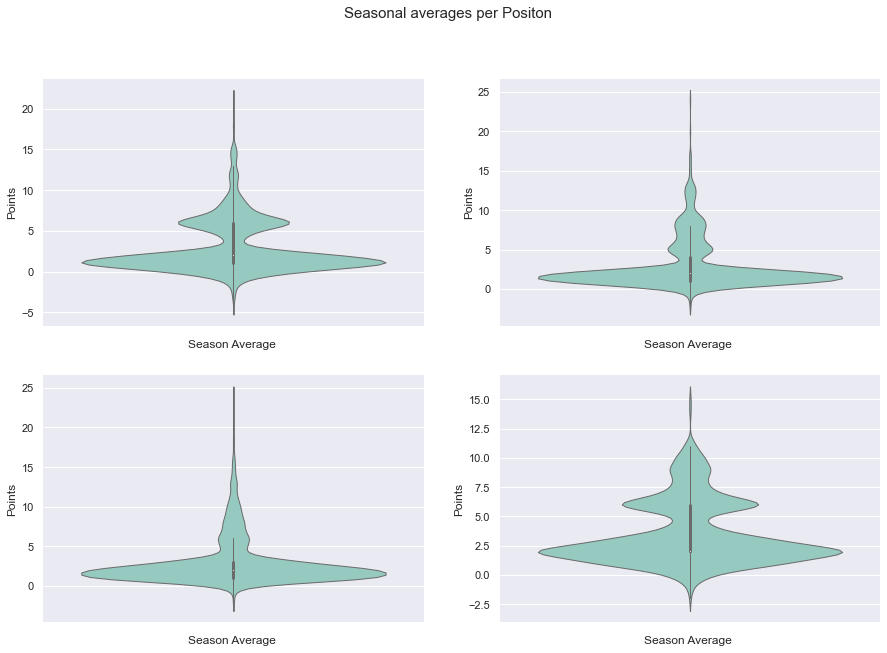

In [92]:
# lets look at overall peformance over the season
position = trendviolin['position'].unique().reshape(2,2)


f, ax = plt.subplots(2,2, figsize=(15,10))



f.suptitle('Seasonal averages per Positon', fontsize=15)
for i in range(2):
    for j in range(2):
        p = position[i,j]
        sns.violinplot( #x="round"
                        y="total_points"
                        ,hue='was_home'
                        ,data=trendviolin[['round','total_points','minutes','was_home','position']].query(f"position == '{p}' & minutes > 0")
                        ,palette="Set3"
                        ,split=True
                        ,bw=.2
                        ,linewidth=1
                        ,ax=ax[i,j]
                        )

# Finalize the figure
p2 = trendviolin['position'].unique()

for ax in ax.flat:
    # print(ax.index())
    ax.set(xlabel=f"Season Average ", ylabel='Points') # think about this 
    
sns.despine(left=True, bottom=True)



In [93]:

pd.pivot_table(trendviolin,
                    values='total_points',
                    index='position',
                    columns=['round'])

round,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DEF,1.375661,1.628866,1.147208,1.661765,1.407767,1.173077,1.259615,1.411483,0.985714,1.331754,1.459716,1.507042,1.554974,1.162037,1.299539,1.390863,1.357143,1.612903,1.045161,0.956790,1.000000,0.933071,1.428030,1.032258,1.489270,1.026087,1.542453,1.132743,1.248428,0.980198,1.173585,1.032787,1.054983,1.353160,1.044534,1.153846,1.240260,0.959514
FWD,1.693333,1.368421,1.730769,1.277108,1.500000,1.482353,1.294118,1.764706,1.635294,1.186047,0.941860,1.639535,1.025316,1.348837,1.218391,1.151899,1.064516,1.115385,1.614035,1.600000,0.943182,1.237624,1.093458,1.098765,0.924731,1.176923,0.976744,1.289855,1.163934,1.241379,1.121495,1.276596,1.139130,1.310680,1.147368,1.144330,0.852459,1.153061
GK,1.245614,1.316667,0.890625,1.257576,1.373134,0.970588,0.941176,1.028571,0.942857,0.861111,1.055556,0.986111,1.169231,0.875000,0.835616,1.147059,1.072727,0.848485,0.730769,1.134615,0.646341,0.786517,1.088889,0.810811,1.231707,0.675214,1.039474,0.818966,0.990909,0.542857,0.709677,0.963855,0.765306,1.191011,0.939759,0.759036,0.980000,0.614458
MID,1.781116,1.461864,1.403361,1.430894,1.369478,1.364000,1.281746,1.367589,1.652174,1.492126,1.203922,1.307692,1.288703,1.328244,1.361217,1.393305,1.470899,1.454545,1.634409,1.310160,1.528369,1.339683,1.041667,1.273764,1.136986,1.363196,1.100775,1.317308,1.125320,1.173228,1.253049,1.322259,1.308571,1.054054,1.229508,1.263844,1.286432,1.385113



p2 = trendviolin['position'].unique()

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

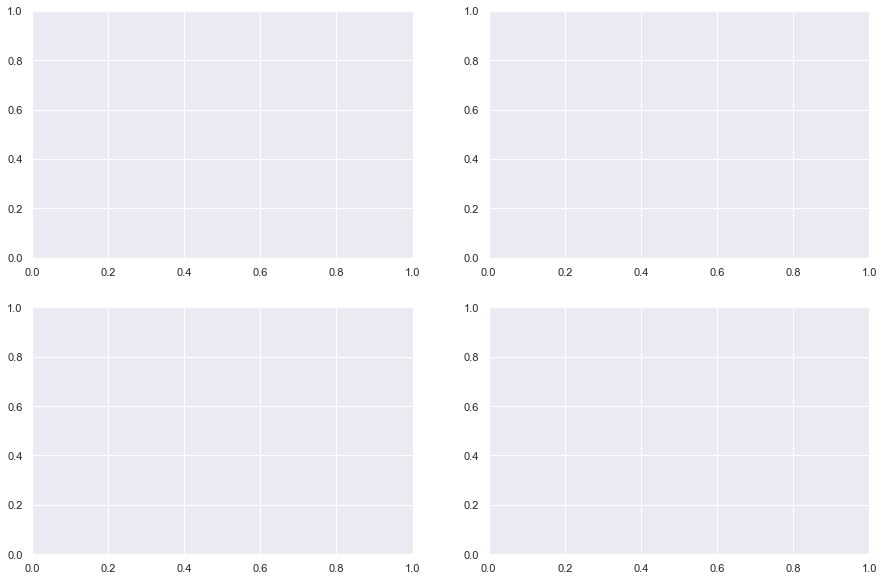

In [94]:
p2 = trendviolin['position'].unique()
f, ax = plt.subplots(2,2, figsize=(15,10))

print(dir(ax))

for ax in ax.flat:
    print(type(ax))
    
    # print(f"Season Average '{p2[ax]}'")




In [ ]:
trendviolin = (gameweek[['position','was_home','round','kickoff_time','minutes','name','total_points','transfers_balance','transfers_in', 'transfers_out' ,'value']]
                .assign(was_home_ind =lambda x:gameweek['was_home'].replace({False: 0,True:1}))
                # .drop('was_home',axis=1)                
                )
trendviolin.sample(5)

<AxesSubplot:xlabel='round', ylabel='transfers_balance'>

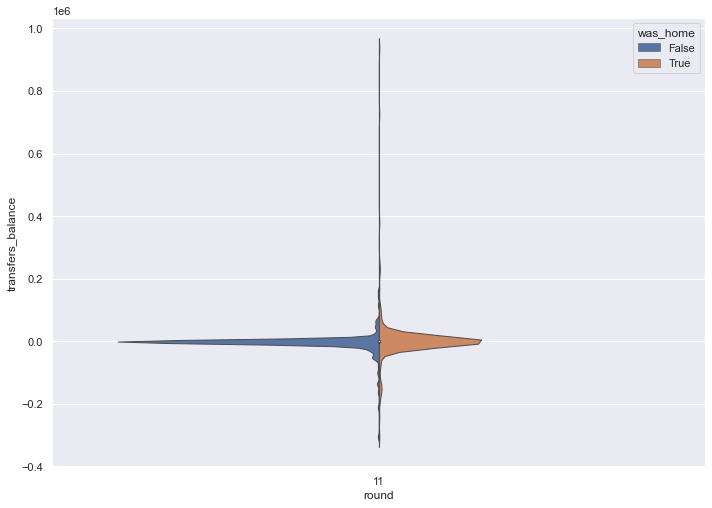

In [50]:



sns.violinplot( x="round"
                , y="transfers_balance"
                ,hue='was_home'
                , data=trendviolin.query(" round ==11")
                # , palette="Set3"
                ,split=True
                , bw=.2
                # , cut=1
                , linewidth=1
                )


[Text(0.5, 1.0, 'Value of players per positions')]

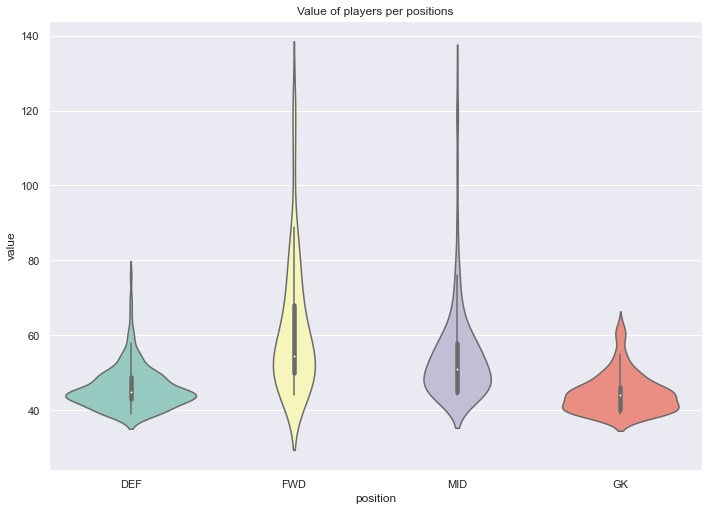

In [108]:


sns.violinplot( x="position"
                ,y="value"
                #,hue='was_home'
                , data=trendviolin.query(" round ==11")
                , palette="Set3"
                # ,split=True
                # , bw=.2
                # , cut=1
                # , linewidth=1
                ).set(title='Value of players per positions')


[Text(0.5, 1.0, 'Points of players per positions')]

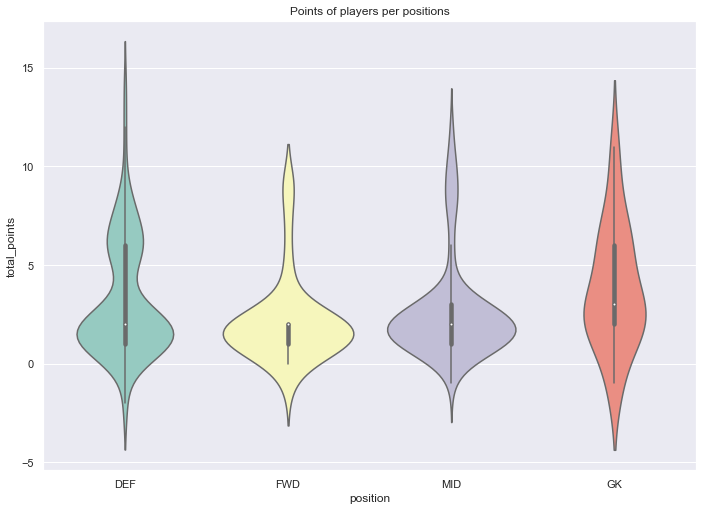

In [109]:
trendviolin['playtime'] = trendviolin['minutes'].apply(playtime)       
sns.violinplot( x="position"
                , y="total_points"
                #,hue='was_home'
                , data=trendviolin.query(" round ==11 & playtime >0")
                , palette="Set3"
                # ,split=True
                # , bw=.2
                # , cut=1
                # , linewidth=1
                ).set(title='Points of players per positions')

[Text(0.5, 1.0, 'Scatter plot of Points earned and Price point of player')]

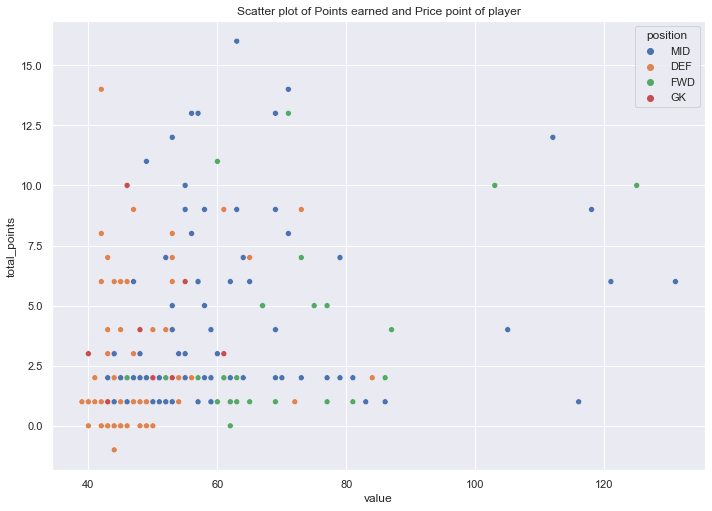

In [112]:
# lets do a scatterplot of value and points

sns.scatterplot(x="value"
                ,y="total_points"
                ,hue="position"
                ,data=trendviolin.query("round ==38 & playtime >0")
                ,).set(title='Scatter plot of Points earned and Price point of player')
# plot evolution of total points and value of players


In [101]:
#last week performance of players who balled

newgame_df = pd.read_csv("Fantasy-Premier-League/data/2022-23/gws/gw1.csv")
newgame_df.sample(5)

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
202,Giulian Biancone,DEF,Nott'm Forest,1.4,0,0,0,0,0.0,399,7,0,0,0.0,0.0,2022-08-06T14:00:00Z,0,15,0,0,0,0,1,0,6448,0,2,0.0,0,0,0,0,45,False,0
272,Nayef Aguerd,DEF,West Ham,0.0,0,0,0,0,0.0,472,10,0,0,0.0,0.0,2022-08-07T15:30:00Z,0,13,0,0,0,0,1,0,9094,2,0,0.0,0,0,0,0,50,True,0
210,Son Heung-min,MID,Spurs,4.2,1,0,23,0,52.5,428,8,1,0,14.5,36.2,2022-08-06T14:00:00Z,90,17,0,0,0,0,1,0,1929156,1,4,56.0,5,0,0,0,120,True,0
91,James Milner,MID,Liverpool,2.5,0,0,1,0,4.7,274,4,1,0,1.6,3.2,2022-08-06T11:30:00Z,31,9,0,0,0,0,1,0,62173,2,2,8.0,1,0,0,0,45,False,0
184,Lucas Digne,DEF,Aston Villa,2.8,0,0,11,0,22.4,33,2,2,0,4.4,13.2,2022-08-06T14:00:00Z,90,3,0,0,0,0,1,0,342130,0,2,8.0,1,0,0,0,50,False,0


<AxesSubplot:xlabel='value', ylabel='total_points'>

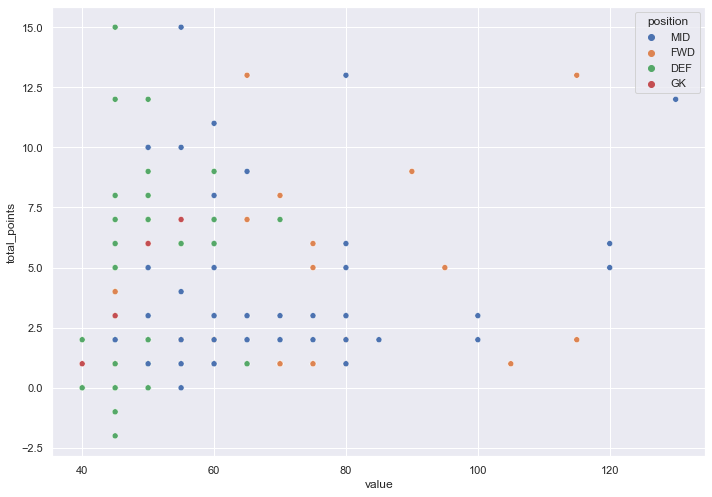

In [102]:


sns.scatterplot(x="value"
                ,y="total_points"
                ,hue="position"
                ,data=newgame_df.query("round ==1 & minutes >0")
                ,)

<AxesSubplot:xlabel='total_points', ylabel='Density'>

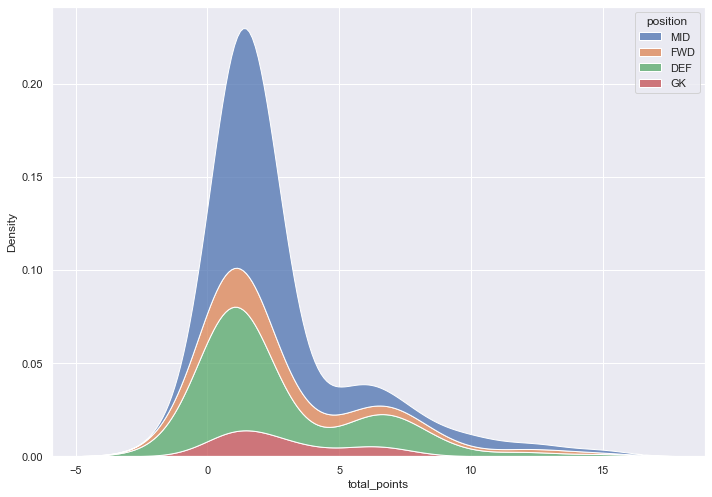

In [103]:
sns.kdeplot(data=newgame_df.query("minutes > 0"), x="total_points", hue='position',multiple='stack')

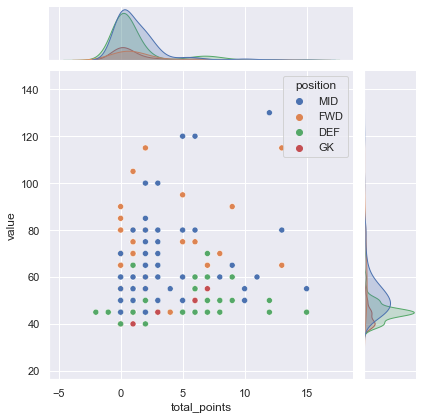

In [85]:
sns.jointplot(data=newgame_df, 
            x="total_points",
            y="value",
            hue="position")

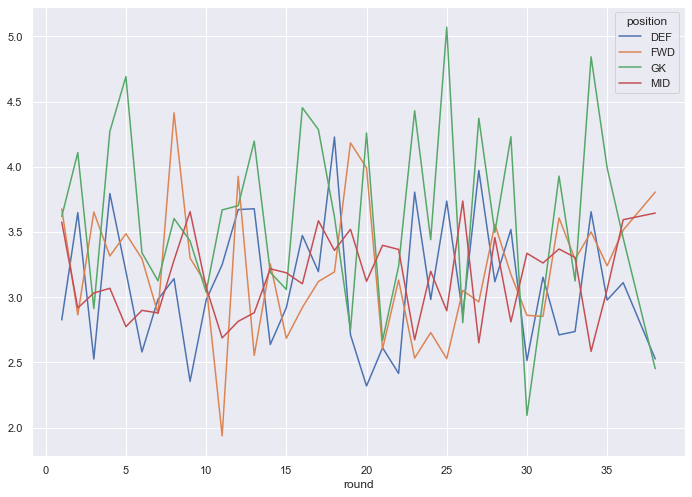

In [134]:
# attempt at plotting a weighted mean function


# trendviolin["value_and_points"] = zip(trendviolin.value, trendviolin.total_points)

# trendviolin["value_and_points"] = trendviolin.value * trendviolin.total_points
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()


w_test =(trendviolin
.query("minutes > 0")
# .query("was_home == False")
.assign(value_and_point = trendviolin['value']*trendviolin['total_points'])
.groupby(['round','position'])
.apply(w_avg,'total_points', 'value')
.unstack()
.plot()
# .mean()
#.sum(['value_and_points','value'])
)

In [124]:
w_test

round,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DEF,74.129702,89.851031,64.049946,94.072151,76.786297,62.991479,62.243991,77.966086,58.621217,68.014417,80.869431,87.748414,86.593821,59.710684,68.910476,80.683098,80.029249,113.817578,54.638963,50.999730,51.139185,56.757378,77.951841,63.239558,80.595048,57.556836,81.092037,63.926072,73.820226,50.084353,61.754049,54.244339,56.289182,74.968597,59.726438,65.648969,53.269428
FWD,136.599576,132.383166,165.319026,153.080679,133.464943,141.429768,120.828952,188.810368,122.311797,123.843178,64.952462,128.239668,88.241464,133.412342,95.149925,99.186070,75.376613,119.336153,167.535006,183.884153,76.818957,116.914675,83.126120,80.628308,92.005038,102.234023,111.712698,113.828478,130.068727,158.424784,91.221508,122.159653,107.417595,126.790639,114.451466,122.098021,118.141801
GK,72.681298,80.301928,52.684446,73.541346,77.101090,56.193791,50.814524,55.075598,58.036694,47.370059,56.343818,61.088813,65.790407,51.636619,48.487670,70.030866,65.067568,58.663320,42.210000,64.932064,36.322099,44.888719,59.949165,49.318603,70.225348,41.292607,57.327503,50.148046,58.775815,29.278250,41.200197,54.193664,43.579452,71.362311,57.624104,49.102013,34.507166
MID,153.544449,110.412897,112.041422,110.814663,104.908266,94.660775,107.083748,121.998131,134.606261,108.622547,86.540630,102.571954,95.830288,114.103657,111.306236,108.476618,133.409689,125.325814,131.443108,96.068872,109.157334,106.114588,73.075475,109.529646,96.507147,128.816482,78.488762,109.305076,83.964217,95.034425,103.120837,112.139587,113.157203,78.955429,90.688750,113.564021,112.296392


In [142]:
trendviolin.team.value_counts()

Watford           1627
Arsenal           1457
Everton           1388
Brighton          1326
Aston Villa       1298
Wolves            1282
Liverpool         1272
Brentford         1271
Norwich           1257
Leeds             1255
Spurs             1195
Chelsea           1153
Man City          1130
Newcastle         1127
West Ham          1118
Man Utd           1113
Leicester         1088
Crystal Palace    1086
Southampton       1064
Burnley           1058
Name: team, dtype: int64

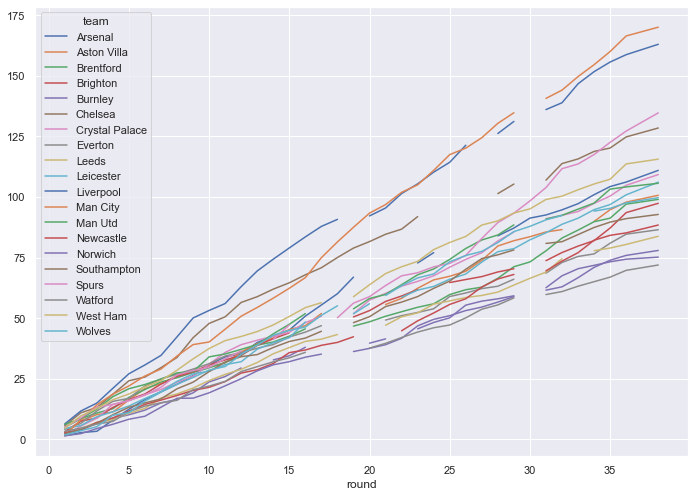

In [146]:

def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()


w_test =(trendviolin
.query("minutes > 0")
# .query("was_home == False")
.assign(value_and_point = trendviolin['value']*trendviolin['total_points'])
.groupby(['round','team'])
.apply(w_avg,'total_points', 'value')
.unstack()
.cumsum()
.plot()
# .mean()
#.sum(['value_and_points','value'])
)